<a href="https://colab.research.google.com/github/Naomiweinberger/Hate-Speech/blob/main/Spacy_twitter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
np.random.seed(0)
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.pipeline import Pipeline as IMBPipeline

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Model Function **

In [ ]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)    
    cnf_matrix_test = confusion_matrix(y_test,  y_pred_test)
    cnf_matrix_train = confusion_matrix(y_train,  y_pred_train)
    print('Confusion Matrix for Train Set:\n', cnf_matrix_train) 
    print('Confusion Matrix for Test Set:\n', cnf_matrix_test)
 
    cnf_matrix_train = confusion_matrix(y_train,  y_pred_train)
  
    print('Classification Report for Train Set:\n',classification_report(y_train, y_pred_train))
    print('Classification Report for Test Set:\n',classification_report(y_test , y_pred_test))
 
    
    plot_confusion_matrix(model, X_test, y_test,
                     cmap=plt.cm.Blues)
    plot_confusion_matrix(model, X_train, y_train,
                     cmap=plt.cm.Blues)
    
   
    return model

**Data**

In [ ]:
import spacy
from tqdm import tqdm
tqdm.pandas()
!python3 -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.3 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=e9b47d4674149457e65480aa2dae59506a6a7c8e8a4be970e2134f4c1d88344d
  Stored in directory: /tmp/pip-ephem-wheel-cache-2vzmo5l8/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
hatespeech_df = pd.read_csv("/content/labeled_data.csv")
hatespeech_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
hatespeech_df_2 = pd.read_csv("/content/train_E6oV3lV.csv")
hatespeech_df_2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
hatespeech_df_1=hatespeech_df[['class','tweet']]

In [ ]:
hatespeech_df_2['class']=hatespeech_df_2['label']

In [ ]:
df_2 = pd.DataFrame(hatespeech_df_2, columns= ['class','tweet'])
df_2['class'] = df_2['class'].replace([1,0],[0,2])

In [ ]:
hatespeech=pd.concat([hatespeech_df_1, df_2])

In [ ]:
hatespeech_df.shape

(24783, 7)

In [ ]:
nlp = spacy.load('en_core_web_sm')
hatespeech['spacy'] = hatespeech.tweet.progress_apply(lambda x: nlp(x))

100%|██████████| 56745/56745 [10:30<00:00, 90.07it/s]


In [ ]:
df= pd.DataFrame(np.vstack([x.vector for x in hatespeech.spacy]))

In [ ]:
X=df
y=hatespeech['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X, y)

**baseline models **


In [ ]:
classifier_kn = KNeighborsClassifier()
classifier_kn.fit(X_train, y_train)
y_pred = classifier_kn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 114  233  387]
 [  71 3153  614]
 [  69  815 5893]]


0.807119570006168

In [ ]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[  93  263  378]
 [ 286 3106  446]
 [ 409 1585 4783]]


0.7033218785796106

In [ ]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 157  219  358]
 [ 249 2462 1127]
 [ 406 1039 5332]]


0.7005903603841748

In [ ]:
classifier_rt=RandomForestClassifier()
classifier_rt.fit(X_train, y_train)
y_pred = classifier_rt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  64  216  454]
 [   0 3184  654]
 [   0  709 6068]]


0.8208652744735219

In [ ]:
classifier_xg=xgb()
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  19  224  491]
 [   0 3161  677]
 [   1  686 6090]]


0.816812053925456

**Base** **models with SMOTE**

In [ ]:
classifier_knn=KNeighborsClassifier()
run_model(classifier_knn, X_train_smote, X_test, y_train_smote, y_test) 

Confusion Matrix for Train Set:
 [[33883     0     0]
 [ 2370 31347   166]
 [10351  4465 19067]]
Confusion Matrix for Test Set:
 [[ 734    0    0]
 [ 447 3355   36]
 [2091  883 3803]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84     33883
           1       0.88      0.93      0.90     33883
           2       0.99      0.56      0.72     33883

    accuracy                           0.83    101649
   macro avg       0.86      0.83      0.82    101649
weighted avg       0.86      0.83      0.82    101649

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.22      1.00      0.37       734
           1       0.79      0.87      0.83      3838
           2       0.99      0.56      0.72      6777

    accuracy                           0.70     11349
   macro avg       0.67      0.81      0.64     11349
weighted avg       0.87      0.70 

In [ ]:
smote_nb = GaussianNB())
run_model(base_model_pipe_nb, X_train, X_test, y_train, y_test)

In [ ]:
base_model_pipe_dt = IMBPipeline(steps=[
    ('smote', SMOTE()),
    ('dt', DecisionTreeClassifier())
])
run_model(base_model_pipe_dt, X_train, X_test, y_train, y_test)

Confusion Matrix for Train Set:
 [[ 2938     0     0]
 [    0 15352     0]
 [    0     0 27106]]
Confusion Matrix for Test Set:
 [[ 175  251  308]
 [  15 3362  461]
 [ 122  982 5673]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2938
           1       1.00      1.00      1.00     15352
           2       1.00      1.00      1.00     27106

    accuracy                           1.00     45396
   macro avg       1.00      1.00      1.00     45396
weighted avg       1.00      1.00      1.00     45396

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.56      0.24      0.33       734
           1       0.73      0.88      0.80      3838
           2       0.88      0.84      0.86      6777

    accuracy                           0.81     11349
   macro avg       0.72      0.65      0.66     11349
weighted avg       0.81      0.81 

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,

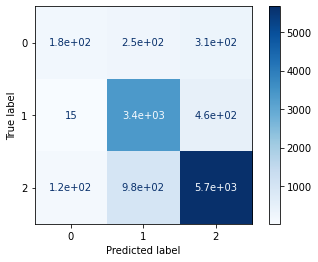

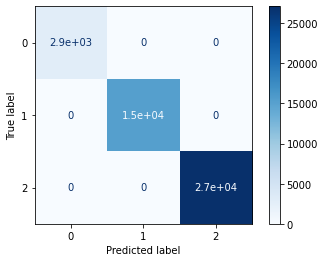

In [ ]:
base_model_pipe_rf = IMBPipeline(steps=[
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier())
])
run_model(base_model_pipe_rf, X_train, X_test, y_train, y_test)

In [ ]:
base_model_pipe_xg = IMBPipeline(steps=[
    ('smote', SMOTE()),
    ('xg', xgb())
])
run_model(base_model_pipe_xg, X_train, X_test, y_train, y_test)

In [ ]:
X_smote=

**SMOTE AND GRID SEARCH**

In [ ]:
model_pipe_lr = IMBPipeline(steps=[
    (('ss', StandardScaler())),
    ('smote', SMOTE()),
    ('lr', LogisticRegression())
])
pipe_grid_lr = {'lr__C': (0.01, 0.1, 1, 10),
    'lr__fit_intercept': (True, False)}

gs_pipe_lr = GridSearchCV(estimator=model_pipe_lr, param_grid=pipe_grid_lr,cv=5)
run_model(gs_pipe_lr, X_train, X_test, y_train, y_test)

In [ ]:
model_pipe_nb = IMBPipeline(steps=[
    ('smote', SMOTE()),
    ('nb', GaussianNB())
])
pipe_grid_nb = {
    'nb__var_smoothing': np.logspace(0,-9, num=100)
}

gs_pipe_nb = GridSearchCV(estimator=model_pipe_nb, param_grid=pipe_grid_nb,cv=5)
run_model(gs_pipe_nb, X_train, X_test, y_train, y_test)

In [ ]:
model_pipe_knn = IMBPipeline(steps=[
    ((('ss', StandardScaler()))),
    ('smote', SMOTE()),
    ('knn', KNeighborsClassifier())
])
pipe_grid_knn = {'knn__n_neighbors': [3, 5, 7], 'knn__p': [1, 2, 3]}

gs_pipe_knn = GridSearchCV(estimator=model_pipe_knn, param_grid=pipe_grid_knn,cv=5)
run_model(gs_pipe_knn, X_train, X_test, y_train, y_test)

In [ ]:
model_pipe_dt = IMBPipeline(steps=[
    ('smote', SMOTE()),
    ('dt', DecisionTreeClassifier())
])
pipe_grid_dt = {'dt__max_depth': [None, 2, 6, 10], 'dt__min_samples_split': [5, 10]}

gs_pipe_dt = GridSearchCV(estimator=model_pipe_dt, param_grid=pipe_grid_dt,cv=5)
run_model(gs_pipe_dt, X_train, X_test, y_train, y_test)

In [ ]:
model_pipe_rf = IMBPipeline(steps=[
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier())
])
pipe_grid_rf = {'rf__n_estimators': [4, 6, 9], 
              'rf__max_features': ['log2', 'sqrt','auto'],
              'rf__criterion': ['entropy', 'gini'], 
              'rf__max_depth': [2, 3, 5, 10], 
              'rf__min_samples_split': [2, 3, 5],
              'rf__min_samples_leaf': [1,5,8] }

gs_pipe_rf = GridSearchCV(estimator=model_pipe_rf, param_grid=pipe_grid_rf)
run_model(gs_pipe_rf, X_train, X_test, y_train, y_test)

In [ ]:
model=xgb
pipe_grid_xg = {'xg__alpha': (0.1, 0.2,0.3), 'xg__max_depth': (5, 7), 'xg__learning_rate': (0.1, .5)}

gs_pipe_xg = GridSearchCV(estimator=model, param_grid=pipe_grid_xg,cv=5)
run_model(gs_pipe_xg, X_train_smote, X_test, y_train_smote, y_test)